In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import signal
import numpy.polynomial.polynomial as poly
import numpy.ma as ma
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot
from matplotlib.ticker import FuncFormatter
from glob import glob
#import cartopy.crs as ccrs
from IPython.display import display
#from cartopy.util import add_cyclic_point
#import cartopy
#import cartopy.crs as ccrs
#from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from scipy.interpolate import interp2d
#map_projection = ccrs.Mollweide
import seaborn as sns
import statsmodels.api as sm
import matplotlib.cm as cm
from scipy import stats
import contourpy
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import cartopy.crs as ccrs

In [3]:
#calculate volume-weighted species

data = xr.open_dataset('/net/fs09/d0/qdzhu/result/Nicole_aquaQPC6_f09_AveChem_LBC_IC/run/AveChem_LBC_IC.i.nc')
lat = data['lat'].values
lon = data['lon'].values

spcs = ['O3_tot_column','LNO_COL_PROD']

output_strs = ['FC2000','FC2000_SST_plus2',
               'ZonalChem_addMEG_2Demis','ZonalChem_plus2_addMEG_2Demis',
               'ZonalChem_addMEG_2Demis_SNOx_plus2_2Demis','ZonalChem_addMEG_plus2_2Demis_SNOx_plus2_2Demis',
               'ZonalChem_plus2_addMEG_plus2_2Demis',
               'ZonalChem_addMEG_2Demis_LNO','ZonalChem_plus2_addMEG_2Demis_LNO']

spcs_comb = np.zeros((len(output_strs),len(spcs),192,288))

for i in range(len(spcs)):
    for j in range(len(output_strs)):
        if 'FC2000' in output_strs[j]:

            aqua_oh = np.load('../Output/camchem_{}_3d/{}_comb_eyear_32.npy'.format(output_strs[j],spcs[i]))
        else:
            aqua_oh = np.load('../Output/aquas_{}_3d/{}_comb.npy'.format(output_strs[j],spcs[i]))
        spcs_comb[j,i,:,:] = aqua_oh[0,:,:]

In [4]:
j=0
i=0
output_str = 'ZonalChem_addMEG_2Demis_LNO'
spc = 'LNO_COL_PROD'
aqua_oh = np.load('../Output/aquas_{}_3d/{}_comb.npy'.format(output_str,spc))
aqua_volume = np.load('../Output/aquas_{}_3d/{}_comb.npy'.format(output_str,'volume_full'))
#*288*42

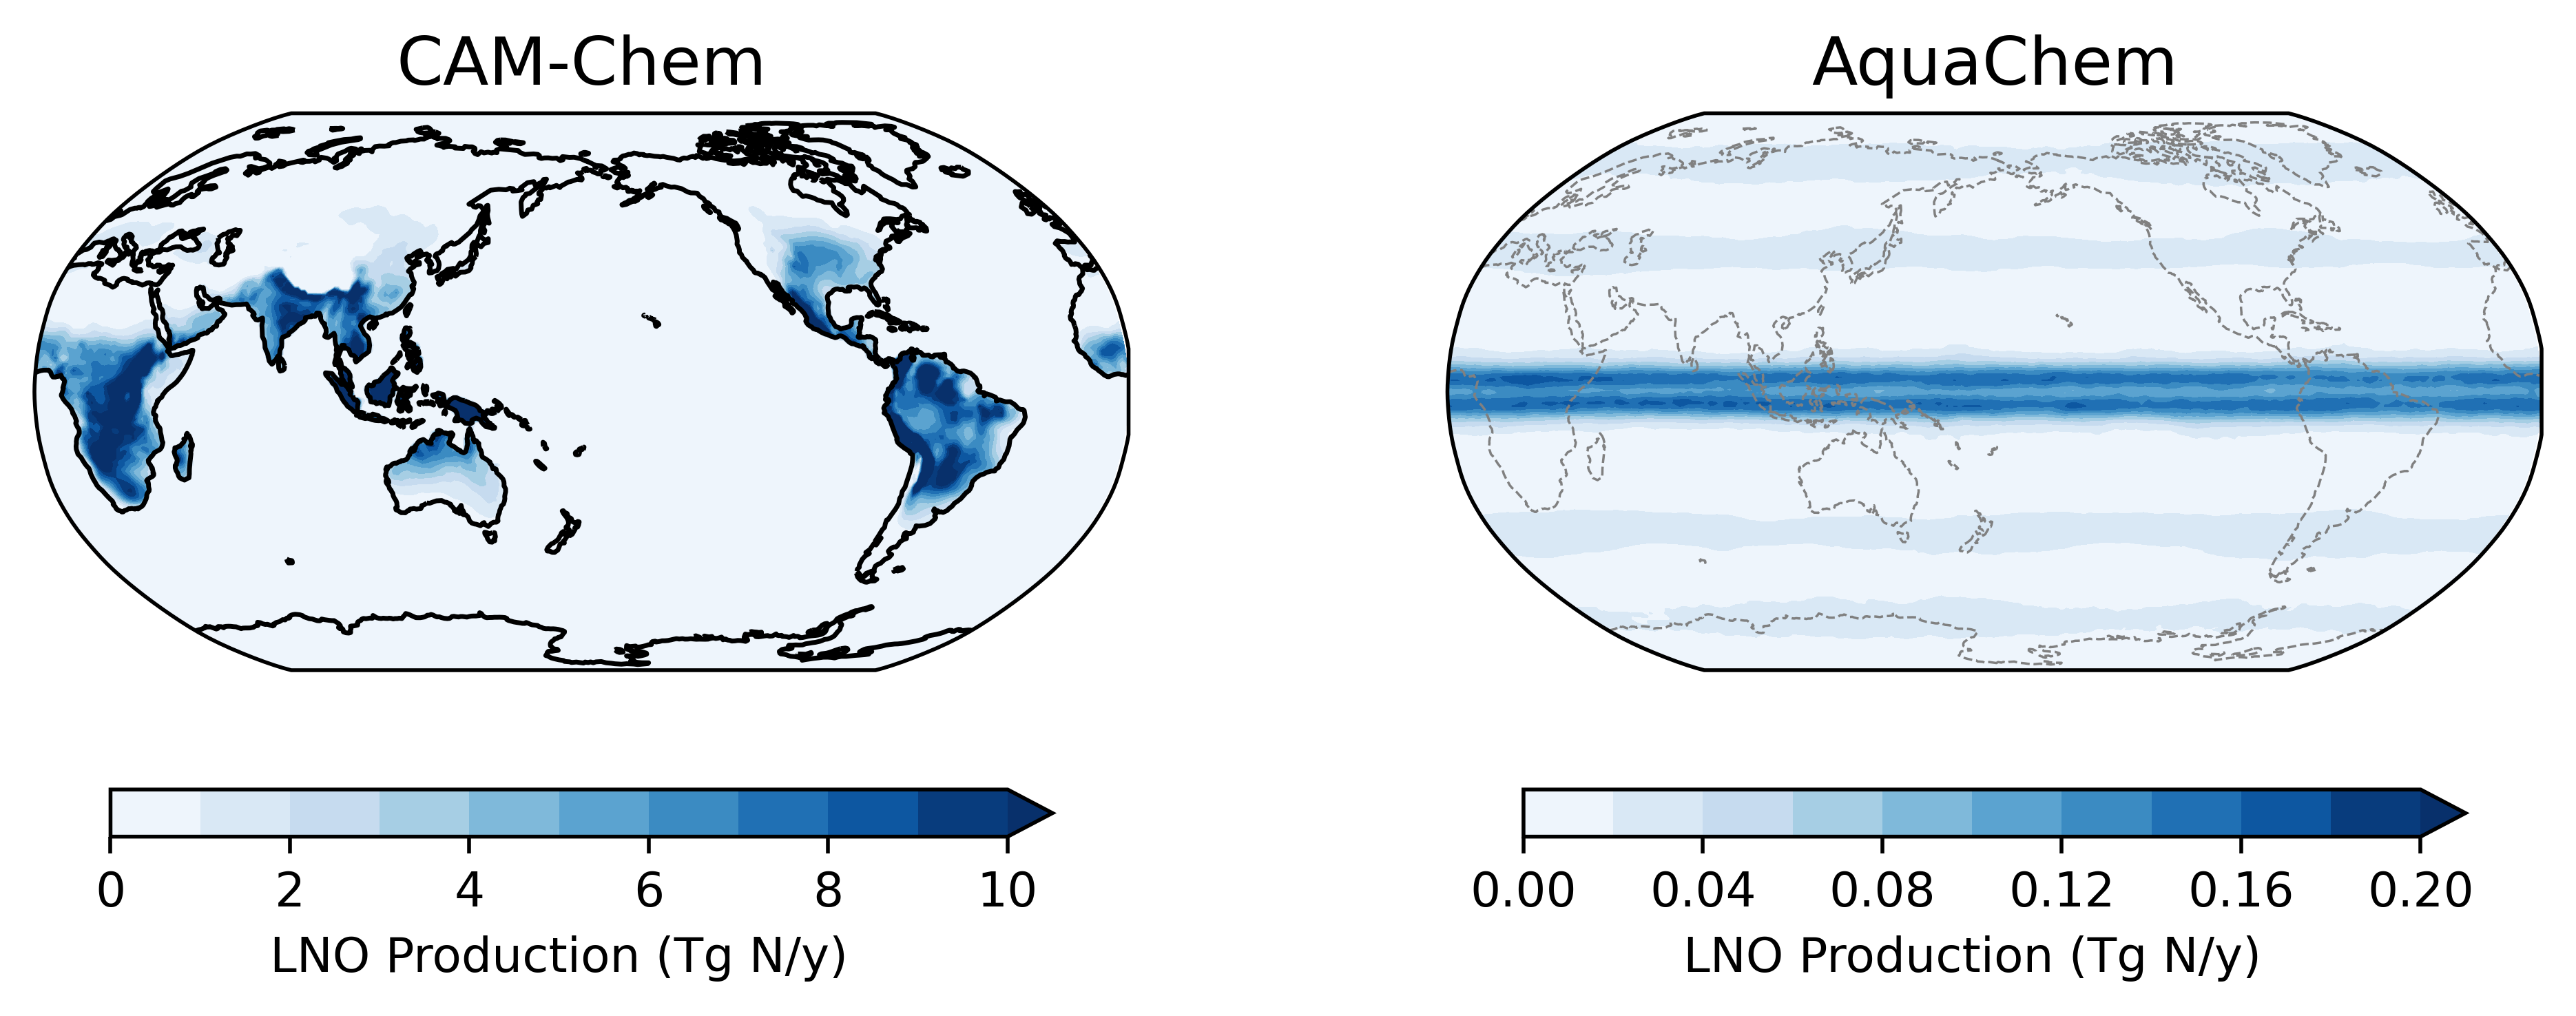

In [7]:
base_indxs = [0,2]
labels = ['CAM-Chem','AquaChem']
indxs = [0,2]
ranges = [10,0.2]
spc_indx = 1
fig = plt.figure(figsize=(15,3),dpi=500)
for i in range(len(base_indxs)):
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[base_indxs[i],spc_indx,:,:]*288*42,levels=np.linspace(0,ranges[i],11),
                      cmap=plt.cm.Blues,transform=ccrs.PlateCarree(),extend='max') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='LNO Production (Tg N/y)')
    ax.set_title(labels[i],fontsize=14)
    #ax.set_title(output_strs[i],fontsize=8)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)
        

In [16]:
for i in range(3):
    print(np.sum(spcs_comb[base_indxs[i],spc_indx,:,:]*288*42))

37436.06076096504
1437.3183462236684
24448.744227745137


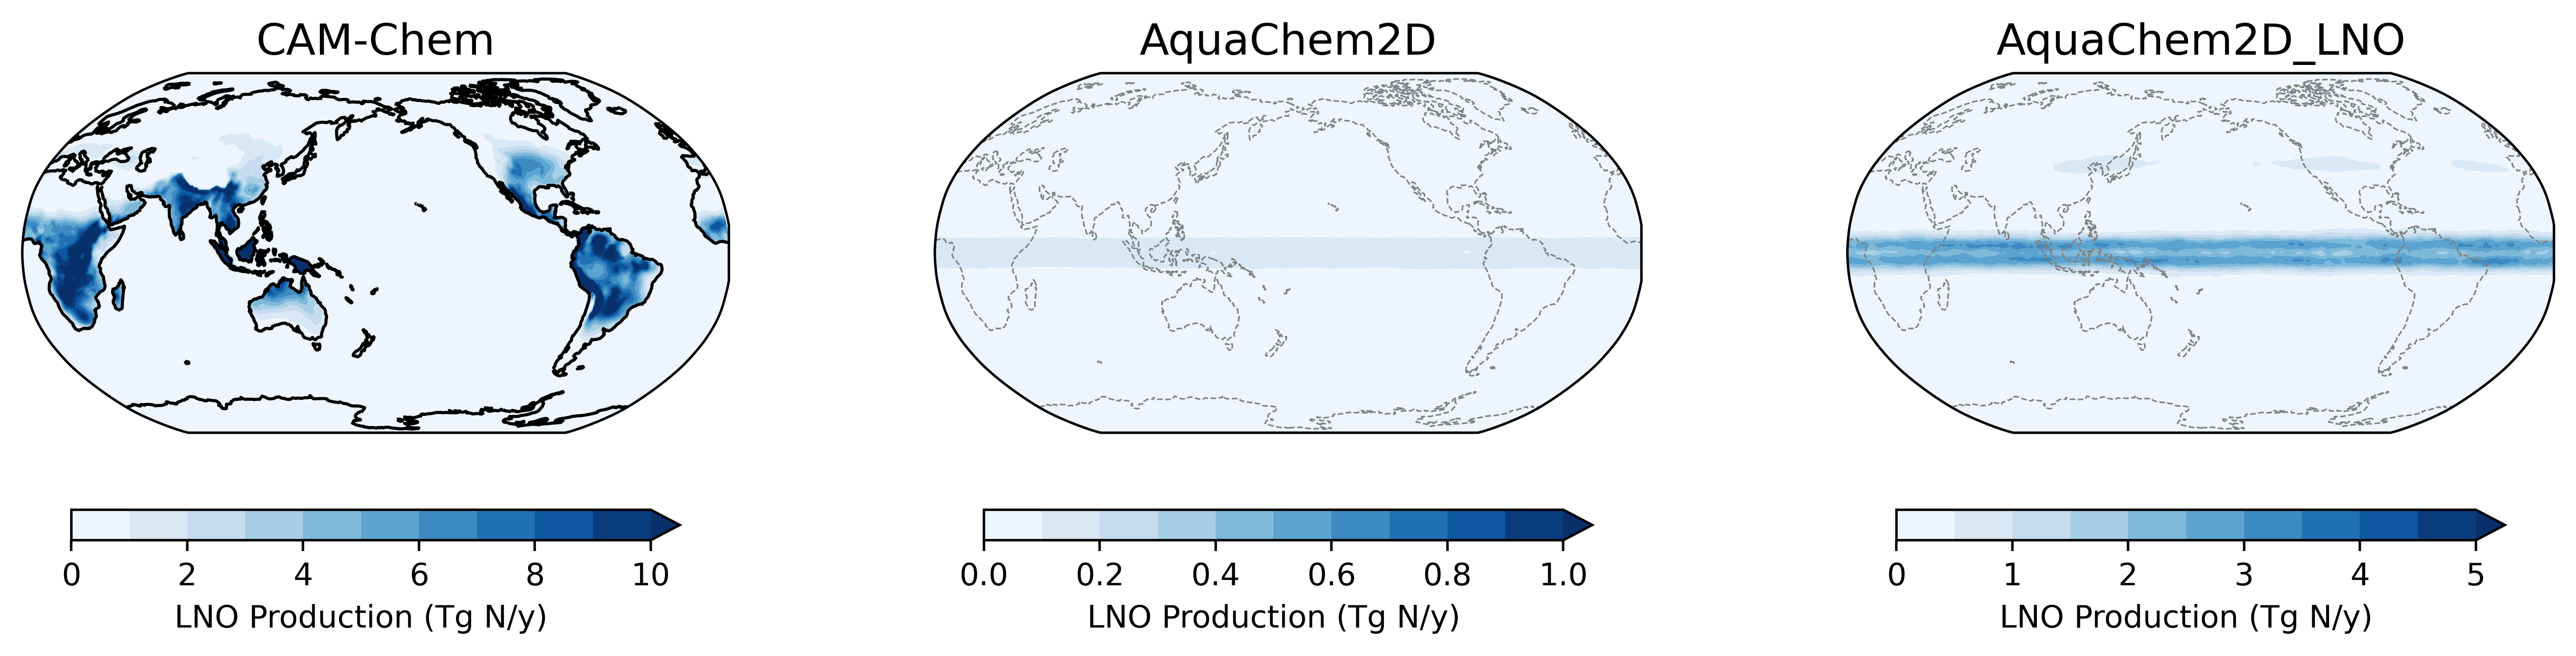

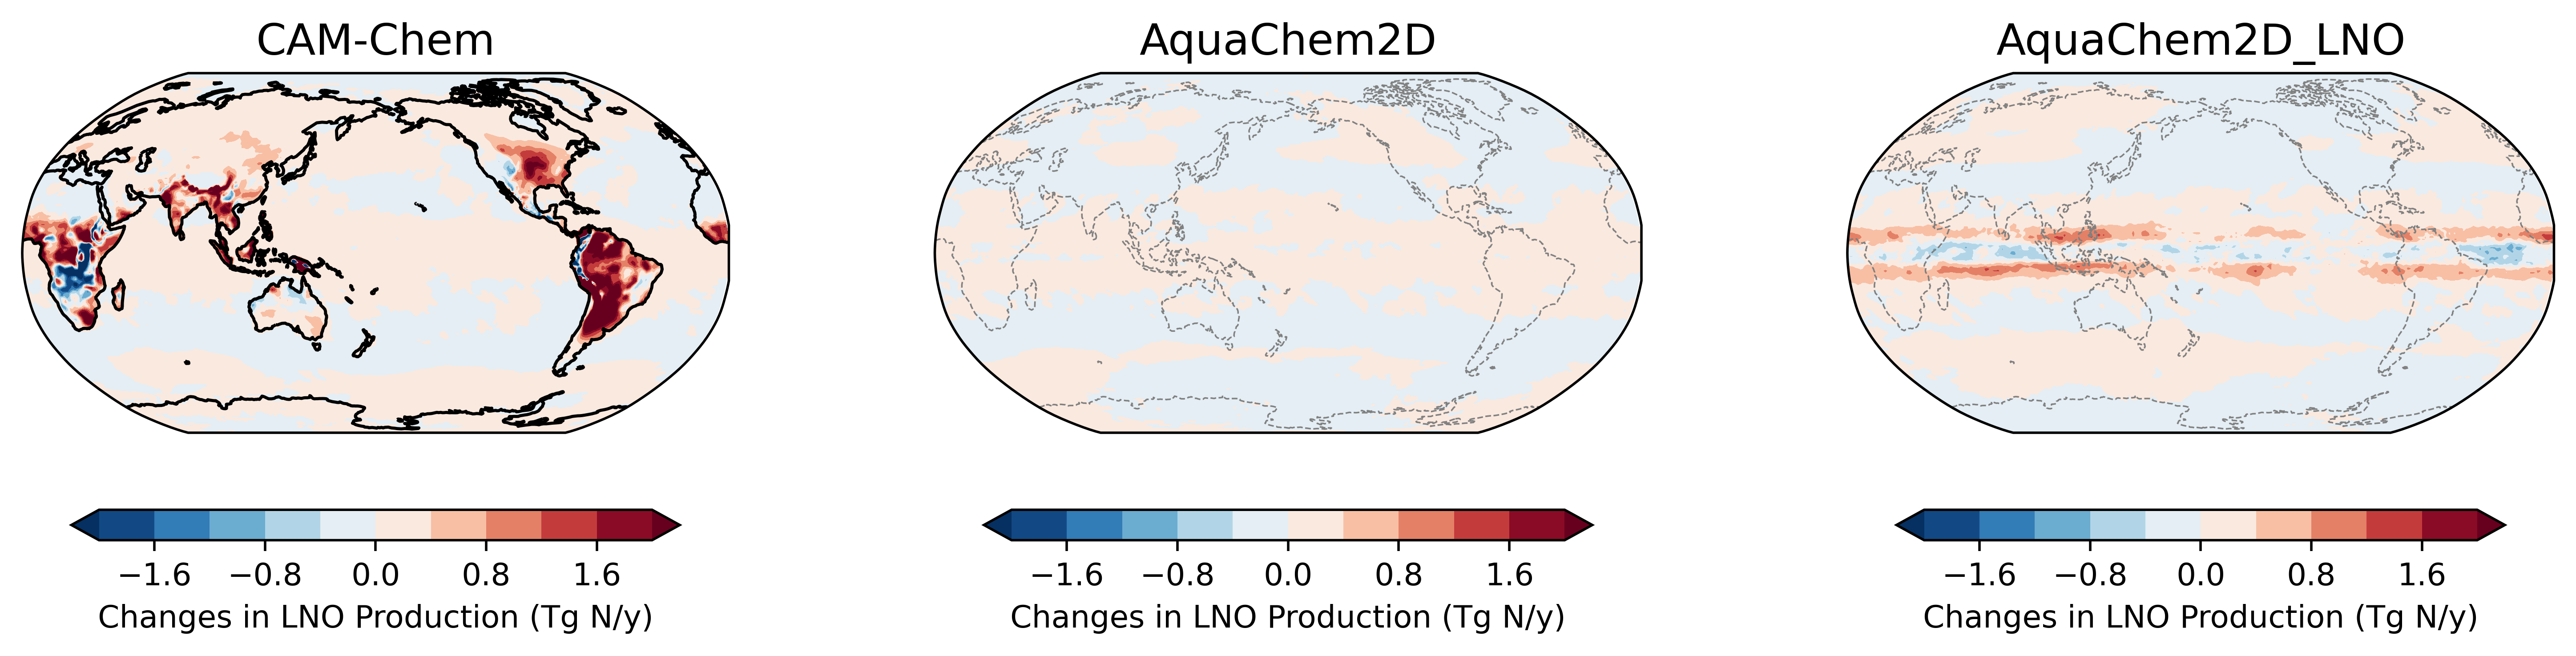

In [30]:
base_indxs = [0,2,7]
warming_indxs = [1,6,8]
labels = ['CAM-Chem','AquaChem2D','AquaChem2D_LNO']
indxs = [0,2]
spc_indx = 1
ranges = [10,1,5]
fig = plt.figure(figsize=(15,3),dpi=500)
for i in range(3):
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[base_indxs[i],spc_indx,:,:]*288*42,levels=np.linspace(0,ranges[i],11),
                      cmap=plt.cm.Blues,transform=ccrs.PlateCarree(),extend='max') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='LNO Production (Tg N/y)')
    ax.set_title(labels[i],fontsize=14)
    #ax.set_title(output_strs[i],fontsize=8)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)
        
fig = plt.figure(figsize=(15,3),dpi=500)

for i in range(3): 
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[warming_indxs[i],spc_indx,:,:]*288*42 - spcs_comb[base_indxs[i],spc_indx,:,:]*288*42,levels=np.linspace(-2,2,11),
                      cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree(),extend='both') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='Changes in LNO Production (Tg N/y)')
    #plt.title('Year {}, month {}'.format(1950+i_year, 1+i_month))
    ax.set_title(labels[i],fontsize=14)
    #ax.set_title(output_strs[i],fontsize=8)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)

In [20]:
for i in range(3):
    print(np.sum(spcs_comb[base_indxs[i],spc_indx,:,:]*288*42))

37436.06076096504
1437.3183462236684
24448.744227745137


In [27]:
for i in range(3):
    print((np.sum(spcs_comb[warming_indxs[i],spc_indx,:,:]*288*42) - np.sum(spcs_comb[base_indxs[i],spc_indx,:,:]*288*42))/np.sum(spcs_comb[base_indxs[i],spc_indx,:,:]*288*42))
                                                                                                                           
                                                                                                                           

0.1347114827350172
0.04364554261603708
0.06148351683958731


In [20]:
37436.06076096504/1437.3183462236684

26.04576839871452

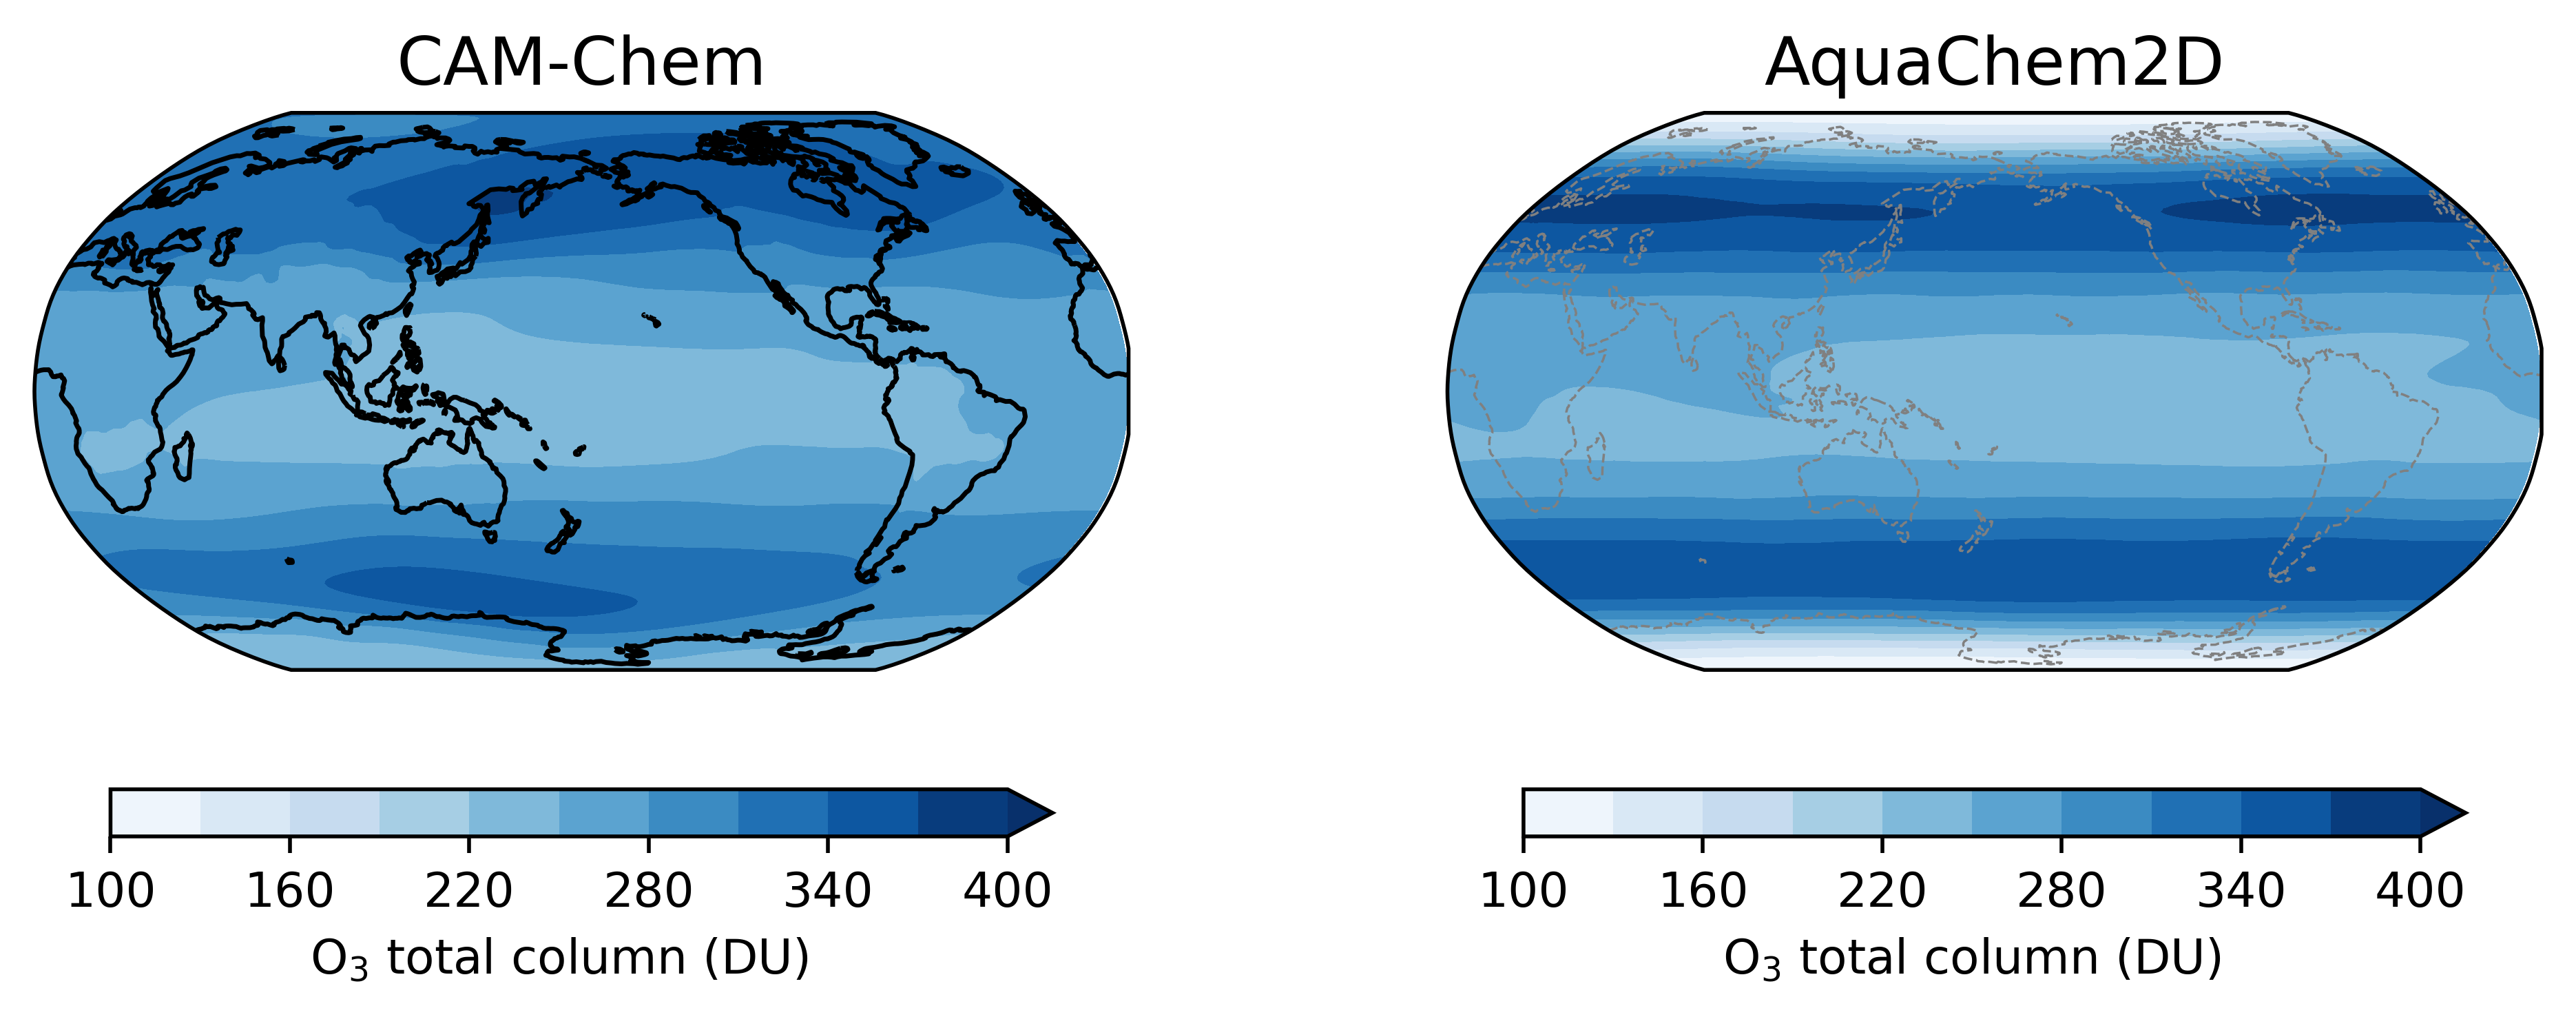

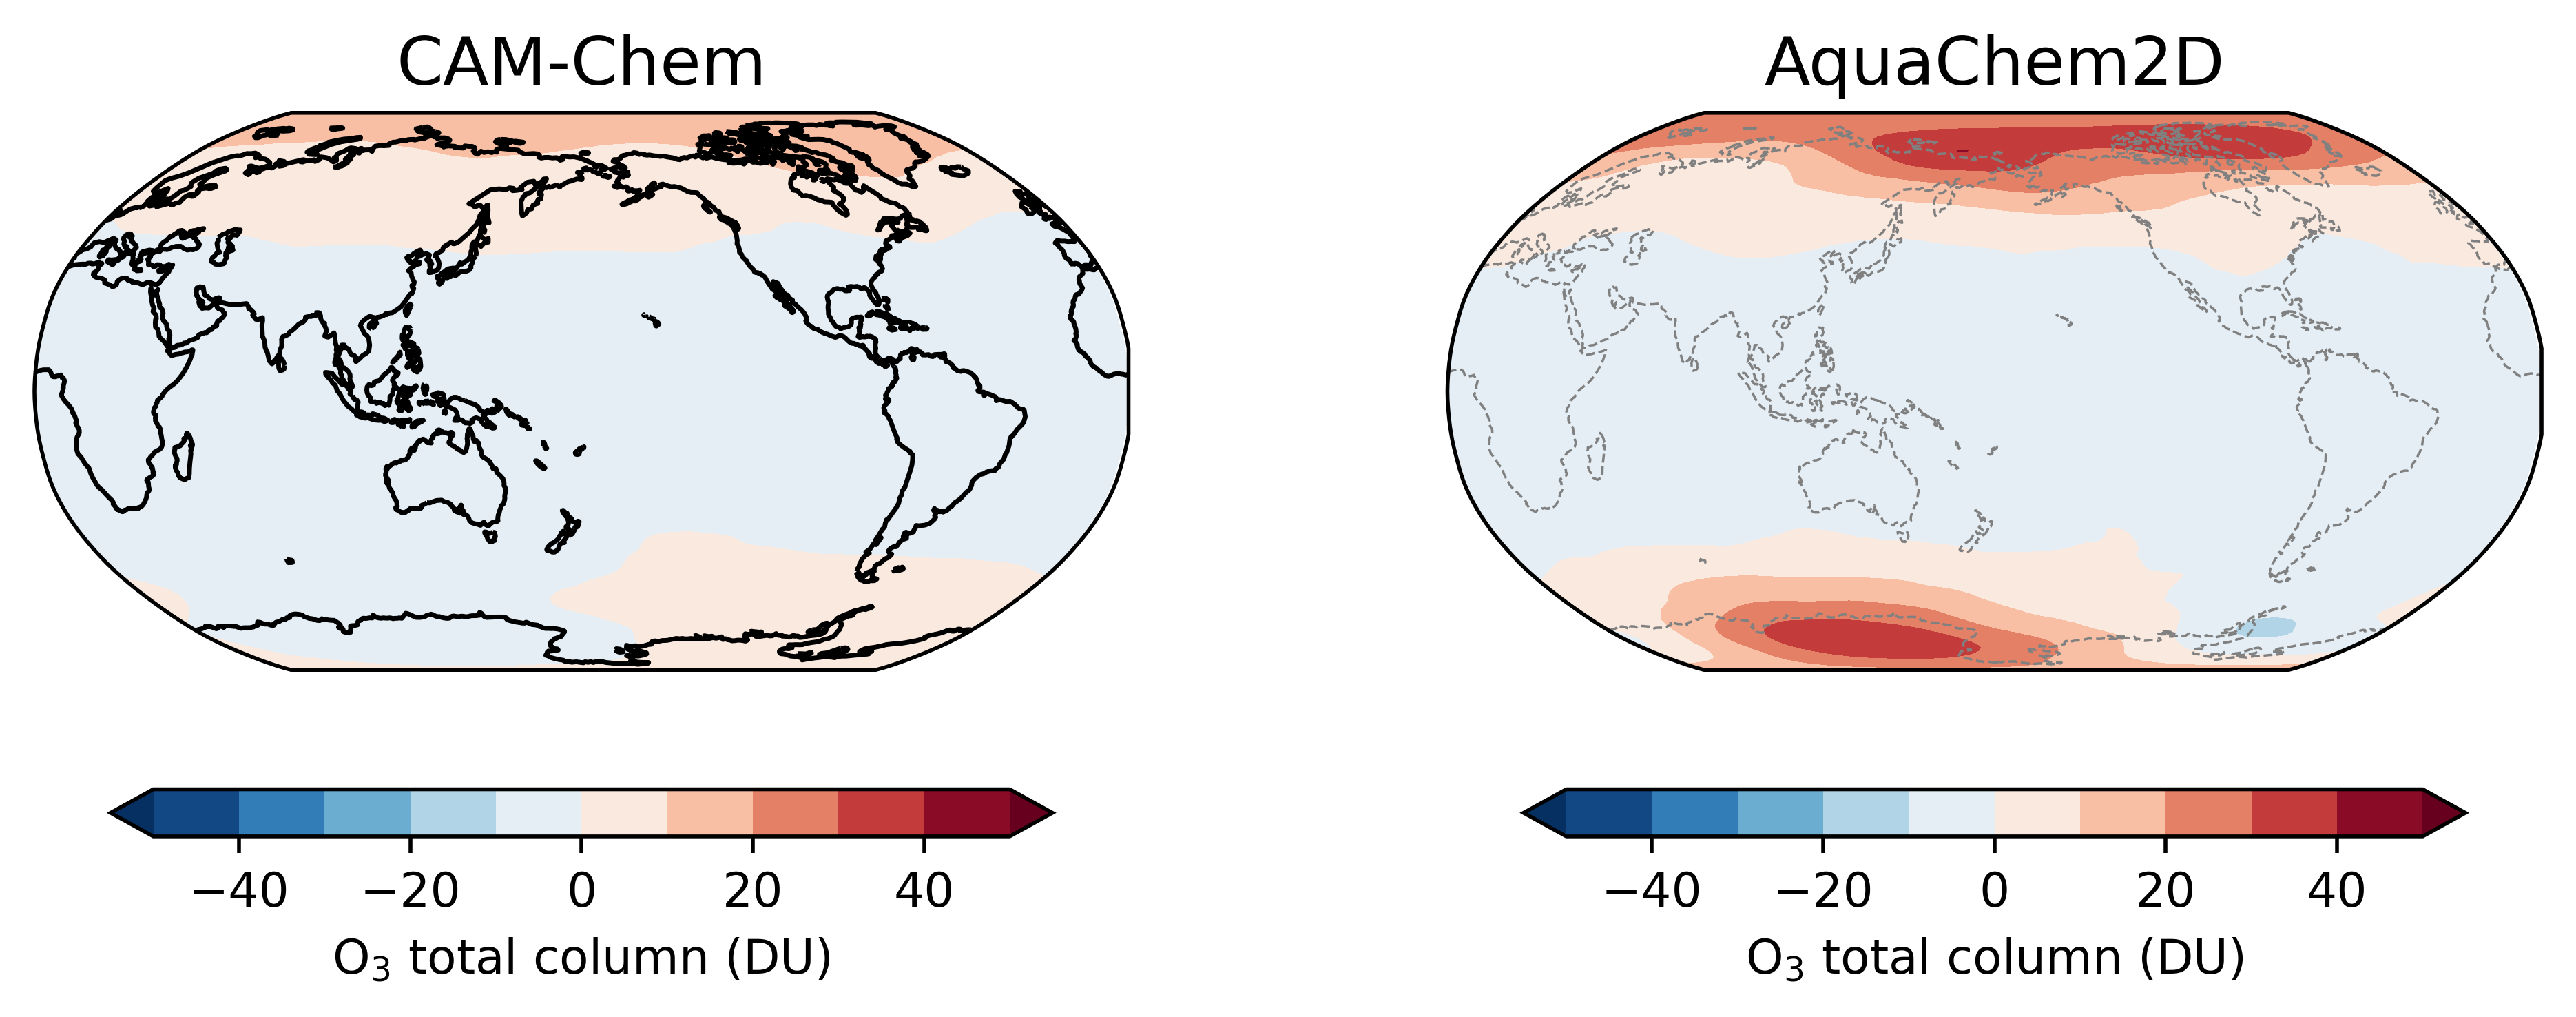

In [15]:
base_indxs = [0,2]
warming_indxs = [1,6]
labels = ['CAM-Chem','AquaChem2D']
indxs = [0,2]
spc_indx = 0
fig = plt.figure(figsize=(15,3),dpi=500)
for i in range(2):
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[base_indxs[i],spc_indx,:,:],levels=np.linspace(100,400,11),
                      cmap=plt.cm.Blues,transform=ccrs.PlateCarree(),extend='max') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='O$_3$ total column (DU)')
    ax.set_title(labels[i],fontsize=14)
    #ax.set_title(output_strs[i],fontsize=8)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)
        
fig = plt.figure(figsize=(15,3),dpi=500)

for i in range(2): 
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[warming_indxs[i],spc_indx,:,:] - spcs_comb[base_indxs[i],spc_indx,:,:],levels=np.linspace(-50,50,11),
                      cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree(),extend='both') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='O$_3$ total column (DU)')
    #plt.title('Year {}, month {}'.format(1950+i_year, 1+i_month))
    ax.set_title(labels[i],fontsize=14)
    #ax.set_title(output_strs[i],fontsize=8)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)

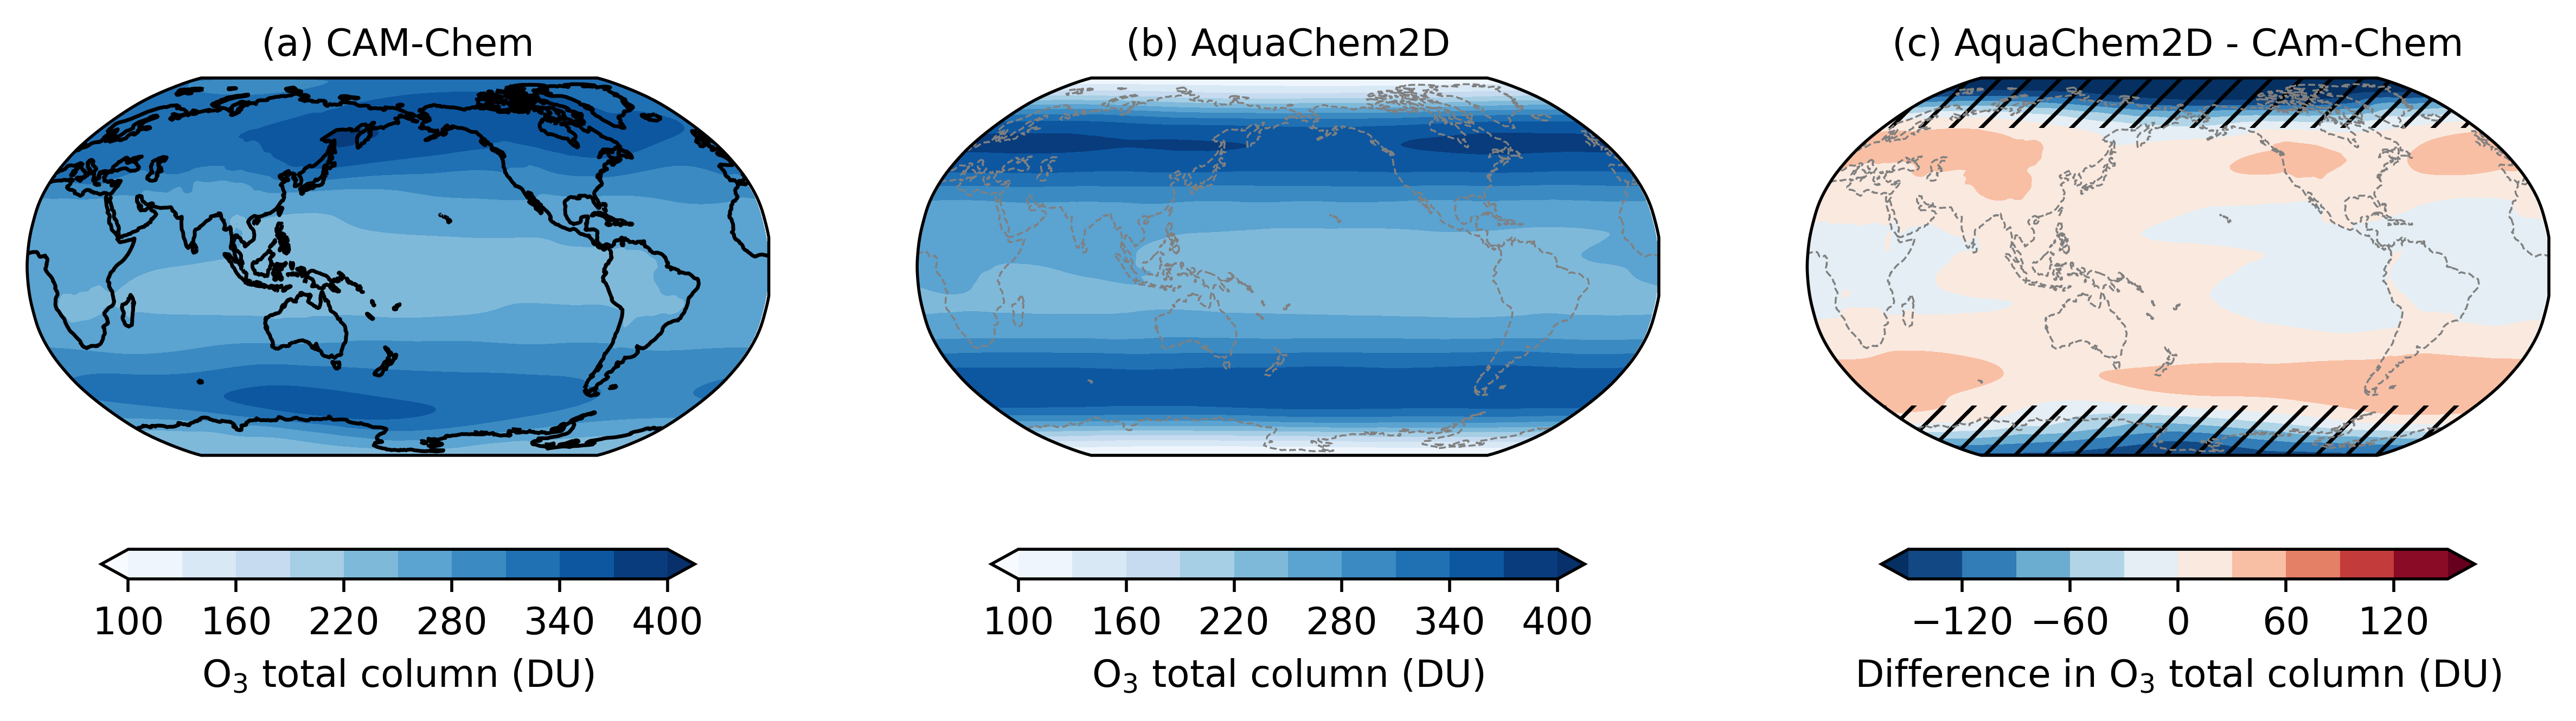

In [40]:
indxs = [0,2]
fig = plt.figure(figsize=(12,3),dpi=500)
labels = ['(a) CAM-Chem','(b) AquaChem2D']

for i in range(2):
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[indxs[i],0,:,:],levels=np.linspace(100,400,11),
                      cmap=plt.cm.Blues,transform=ccrs.PlateCarree(),extend='both') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='O$_3$ total column (DU)')
    #plt.title('Year {}, month {}'.format(1950+i_year, 1+i_month))
    ax.set_title(labels[i],fontsize=10)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)
        
ax = fig.add_subplot(131+2,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
plot=plt.contourf(lon,lat,spcs_comb[indxs[1],0,:,:] - spcs_comb[indxs[0],0,:,:],levels=np.linspace(-150,150,11),
                  cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree(),extend='both') 
density=3
filter_indx = np.zeros((192,288))
lat_indx = (lat>60) | (lat<-60)
filter_indx[lat_indx,:] = 1
plt.contourf(
    lon, lat, filter_indx,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'/',density*'/'],
)
cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='Difference in O$_3$ total column (DU)')
#plt.title('Year {}, month {}'.format(1950+i_year, 1+i_month))
ax.set_title('(c) AquaChem2D - CAm-Chem',fontsize=10)
if i == 0:
    ax.coastlines()
else:
    ax.coastlines(linestyle='--',color='gray',linewidth=0.5)


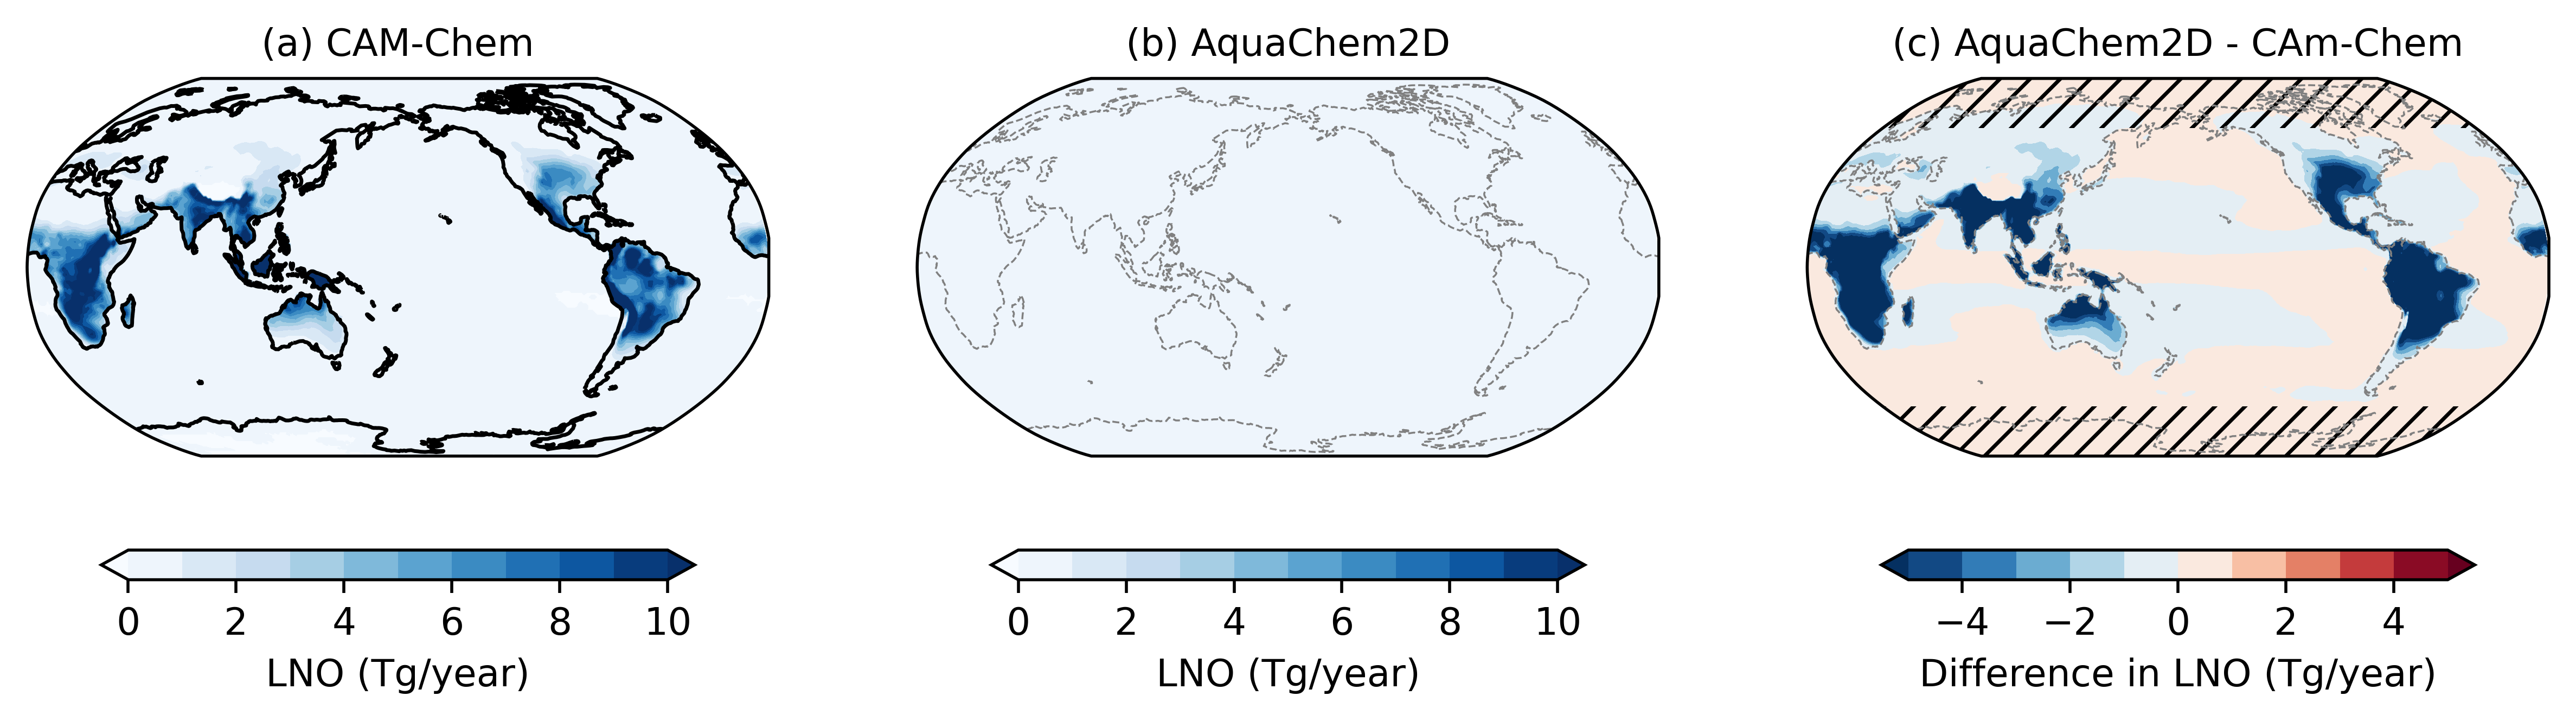

In [28]:
indxs = [0,2]
fig = plt.figure(figsize=(12,3),dpi=500)
labels = ['(a) CAM-Chem','(b) AquaChem2D']

for i in range(2):
    ax = fig.add_subplot(131+i,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
    plot=plt.contourf(lon,lat,spcs_comb[indxs[i],1,:,:]*288*42,levels=np.linspace(0,10,11),
                      cmap=plt.cm.Blues,transform=ccrs.PlateCarree(),extend='both') 

    cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='LNO (Tg/year)')
    #plt.title('Year {}, month {}'.format(1950+i_year, 1+i_month))
    ax.set_title(labels[i],fontsize=10)
    if i == 0:
        ax.coastlines()
    else:
        ax.coastlines(linestyle='--',color='gray',linewidth=0.5)
        
ax = fig.add_subplot(131+2,projection=ccrs.Robinson(central_longitude=180),facecolor='white',frameon=True)
plot=plt.contourf(lon,lat,spcs_comb[indxs[1],1,:,:]*288*42 - spcs_comb[indxs[0],1,:,:]*288*42,levels=np.linspace(-5,5,11),
                  cmap=plt.cm.RdBu_r,transform=ccrs.PlateCarree(),extend='both') 
density=3
filter_indx = np.zeros((192,288))
lat_indx = (lat>60) | (lat<-60)
filter_indx[lat_indx,:] = 1
plt.contourf(
    lon, lat, filter_indx,
    transform=ccrs.PlateCarree(),
    colors='none',
    levels=[.5,1.5],
    hatches=[density*'/',density*'/'],
)
cb=plt.colorbar(plot,ax=ax,shrink=0.8, orientation = 'horizontal',label='Difference in LNO (Tg/year)')
#plt.title('Year {}, month {}'.format(1950+i_year, 1+i_month))
ax.set_title('(c) AquaChem2D - CAm-Chem',fontsize=10)
if i == 0:
    ax.coastlines()
else:
    ax.coastlines(linestyle='--',color='gray',linewidth=0.5)
